In [ ]:
!apt install python-opengl
!apt install ffmpeg
!apt install xvfb
!pip3 install pyvirtualdisplay
!pip install gymnasium stable-baselines3[extra] pyglet swig

from pyvirtualdisplay import Display
virtual_display = Display(visible=0, size=(1400, 900))
virtual_display.start()

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package python-opengl
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
xvfb is already the newest version (2:21.1.4-2ubuntu1.7~22.04.16).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 73.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.2/187.2 kB 13.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import gymnasium as gym
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import os
import base64
from IPython.display import HTML
from pyvirtualdisplay import Display

In [ ]:
# Start a virtual display
display = Display(visible=0, size=(1400, 900))
display.start()

def show_video(video_folder="videos"):
    """Helper function to display a video in Colab"""
    list_files = [f for f in os.listdir(video_folder) if f.endswith(".mp4")]
    if len(list_files) == 0:
        print(f"No video found in {video_folder}")
        return

    mp4 = os.path.join(video_folder, list_files[0])
    video = open(mp4, 'r+b').read()
    encoded = base64.b64encode(video).decode()

    # Display the video
    return HTML(data=f'''
        <video alt="test" autoplay controls style="height: 400px;">
            <source src="data:video/mp4;base64,{encoded}" type="video/mp4" />
        </video>''')


In [ ]:
gamma=0.99 # 할인율
eps=1.0
eps_decay=0.9999
eps_min=0.05
n_episode=2000

greedy_select=lambda x:np.random.choice(np.argwhere(x==np.max(x)).flatten())

def build_network(): # 신경망 만들기(MLP)
    mlp=Sequential()
    mlp.add(Dense(32,input_dim=s_dim,activation='relu'))
    mlp.add(Dense(32,activation='relu'))
    mlp.add(Dense(a_dim,activation='linear'))
    mlp.compile(loss='MSE',optimizer=Adam(learning_rate=0.01))
    return mlp

env=gym.make('CartPole-v1')
s_dim=env.observation_space.shape[0] # 상태 공간 차원
a_dim=env.action_space.n # 행동 공간 차원

model=build_network() # 신경망 생성

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10 번째 에피소드 길이: 21.9
20 번째 에피소드 길이: 15.9
30 번째 에피소드 길이: 25.2
40 번째 에피소드 길이: 27.6
50 번째 에피소드 길이: 21.1
60 번째 에피소드 길이: 20.8
70 번째 에피소드 길이: 27.4
80 번째 에피소드 길이: 32.9
90 번째 에피소드 길이: 22.1
100 번째 에피소드 길이: 34.9
110 번째 에피소드 길이: 33.5
120 번째 에피소드 길이: 26.0
130 번째 에피소드 길이: 34.8
140 번째 에피소드 길이: 23.5
150 번째 에피소드 길이: 49.7
160 번째 에피소드 길이: 39.6
170 번째 에피소드 길이: 25.2
180 번째 에피소드 길이: 62.5
190 번째 에피소드 길이: 57.7
200 번째 에피소드 길이: 15.5
210 번째 에피소드 길이: 50.2
220 번째 에피소드 길이: 60.5
230 번째 에피소드 길이: 44.7
240 번째 에피소드 길이: 48.6
250 번째 에피소드 길이: 89.3
260 번째 에피소드 길이: 67.1
270 번째 에피소드 길이: 54.0
280 번째 에피소드 길이: 146.1
290 번째 에피소드 길이: 22.4
300 번째 에피소드 길이: 12.3
310 번째 에피소드 길이: 14.6
320 번째 에피소드 길이: 12.6
330 번째 에피소드 길이: 13.8
340 번째 에피소드 길이: 23.5
350 번째 에피소드 길이: 81.1
360 번째 에피소드 길이: 11.1
370 번째 에피소드 길이: 108.5
380 번째 에피소드 길이: 142.3
390 번째 에피소드 길이: 120.7
400 번째 에피소드 길이: 125.4
410 번째 에피소드 길이: 95.6
420 번째 에피소드 길이: 167.0
430 번째 에피소드 길이: 178.8
440 번째 에피소드 길이: 189.8
450 번째 에피소드 길이: 236.5
460 번째 에피소드 길이: 196.6
470 번째 에피소드 길이: 213.5
480 번째 에피소드

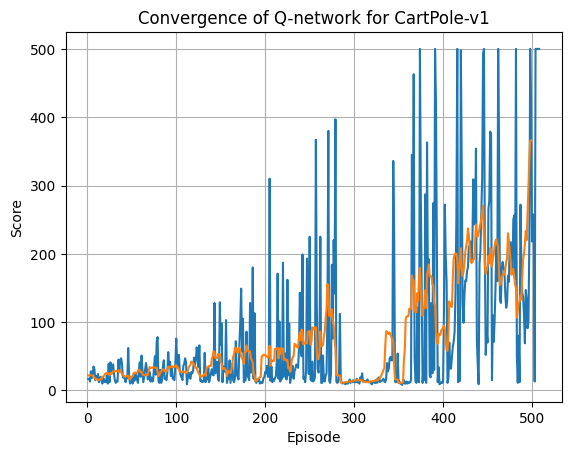

In [ ]:
epi_length=[] # 에피소드의 길이
for i in range(n_episode): # 신경망 학습
    s,info=env.reset()
    length=0
    while True:
        y_=model.predict(s.reshape([1,s_dim]),verbose=0)[0]
        if np.random.random()<eps:
            a=np.random.randint(0,a_dim)
        else:
            a=greedy_select(y_)
        s1,r,terminated,truncated,info=env.step(a)
        x=s; y=y_
        y1_=model.predict(s1.reshape([1,s_dim]),verbose=0)[0]

        if terminated:
            y[a]=r
        else:
            y[a]=r+gamma*np.max(y1_)

        model.fit(x.reshape([1,s_dim]),y.reshape([1,a_dim]),batch_size=1,epochs=1,verbose=0)

        s=s1
        length+=1
        eps=max(eps_min,eps*eps_decay) # 엡실론 스케줄링

        if terminated or truncated:
            epi_length.append(length)
            break

    if np.min(epi_length[-5:])>=env.spec.max_episode_steps: # 연속 5번 최대 길이 넘으면 수렴
        break
    if (i+1)%10==0:
        print(i+1,'번째 에피소드 길이:',np.mean(epi_length[-10:]))

# model.save('./f6-2.keras') # 신경망 저장
env.close()

plt.plot(range(1,len(epi_length)+1),epi_length) # 수렴 곡선 그리기
smooth=np.convolve(epi_length,10*[0.1],mode='valid')
plt.plot(range(1,len(smooth)+1),smooth)
plt.title('Convergence of Q-network for CartPole-v1')
plt.ylabel('Score')
plt.xlabel('Episode')
plt.grid()
plt.show()

In [ ]:
from stable_baselines3.common.vec_env import DummyVecEnv, VecVideoRecorder
from stable_baselines3.common.env_util import make_vec_env

# model = load_model('./f6-2.keras') # 신경망 불러옴

env_id = "CartPole-v1"

# Create a vectorized environment for SB3, specifying the render_mode
vec_env = make_vec_env(env_id, n_envs=1, seed=0, wrapper_kwargs={
    'render_mode': 'rgb_array'
})

# env = gym.make("CartPole-v1",render_mode='rgb_array')
# s_dim = env.observation_space.shape[0] # 상태 공간 차원

# Record the video of the trained agent
video_folder = "videos"
video_length = 500
eval_env = DummyVecEnv([lambda: gym.make(env_id, render_mode="rgb_array")])

s_dim = eval_env.observation_space.shape[0] # 상태 공간 차원


# Wrap the evaluation environment with VecVideoRecorder
eval_env = VecVideoRecorder(
    eval_env,
    video_folder=video_folder,
    record_video_trigger=lambda step: step == 0,  # Record only the first episode
    video_length=video_length,
    name_prefix=f"ppo-agent-{env_id}"
)

length = 0
s = eval_env.reset()

while True:
    q = model.predict(np.reshape(s,[1,s_dim]),verbose=0) # 신경망이 예측한 행동
    a = np.argmax(q[0])
    s,r,dones,info = eval_env.step(np.array([a])) # Modified: Unpack 4 values and use 'dones'
    length += 1

    if dones[0]: # Check dones[0] for termination/truncation status of the single environment
        print("에피소드의 점수:",length)
        break

env.close()

# 4. Display the video in Colab
show_video(video_folder)


Saving video to /content/videos/ppo-agent-CartPole-v1-step-0-to-step-500.mp4


/usr/local/lib/python3.12/dist-packages/moviepy/config_defaults.py:47: SyntaxWarning: invalid escape sequence '\P'
  IMAGEMAGICK_BINARY = r"C:\Program Files\ImageMagick-6.8.8-Q16\magick.exe"
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Moviepy - Building video /content/videos/ppo-agent-CartPole-v1-step-0-to-step-500.mp4.
Moviepy - Writing video /content/videos/ppo-agent-CartPole-v1-step-0-to-step-500.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/ppo-agent-CartPole-v1-step-0-to-step-500.mp4
에피소드의 점수: 500
